# Spiral Animation \###

In [1]:
import pandas as pd
import numpy as np
from plotnine import (
    ggplot,
    aes,
    geom_path,
    theme,
    theme_void,
    lims
)
from plotnine.animation import PlotnineAnimation

# for animation in the notebook
from matplotlib import rc
rc('animation', html='html5')

### Spiral Animation

*How to create Animations*

The `PlotnineAnimation` methods takes a sequence of plots and animates
them. The best way to create the sequence is to use a function that
generates plots.

**NOTE**: When creating the plots make sure *all the plots* have scales
with the same limits for each aesthetic, including the `x` and `y`
aesthetics.

In [2]:
# Parameters used to control the spiral
n = 100
tightness = 1.3
kmin = 1
kmax = 25
num_frames = 25
theta = np.linspace(-np.pi, np.pi, n)

def plot(k):
    # For every plot we change the theta
    _theta = theta*k
    
    # Polar Equation of each spiral
    r = tightness*_theta
    
    df = pd.DataFrame({
        'theta': _theta,
        'r': r,
        'x': r*np.sin(_theta),
        'y': r*np.cos(_theta)
    })

    p = (ggplot(df)
         + geom_path(aes('x', 'y', color='theta'), size=1)
         + lims(
             # All the plots have scales with the same limits
             x=(-130, 130),
             y=(-130, 130),
             color=(-kmax*np.pi, kmax*np.pi)
         )
         + theme_void()
         + theme(
             aspect_ratio=1,
             # Make room on the right for the legend
             subplots_adjust={'right': 0.85}
         )
    )
    return p

# It is better to use a generator instead of a list
plots = (plot(k) for k in np.linspace(kmin, kmax, num_frames))
ani = PlotnineAnimation(plots, interval=100, repeat_delay=500)
# ani.save('/tmp/animation.mp4')
ani

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAChjBtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
CXdliIQAP//+92ifAptaQ3qA5JXFJdtPgf+rZ3B8j+kDAAADAAADAAAEMCOP9CT+H5qTAAADAEQA
CwhDAh4YYXIaq3CfiBJ7gA90x9Rgt5lVcTJLCykfuWS1lovphxFp6QoV2xBehH/wdooltQyEK/vv
upvcuR5KfqvpiwxwVhtGBEilclX9SMYtyHkxmqqxRA8LJ73PKubshXRCXR95O+PV7K6t/uO3nQkF
HaeMJg1zaDpB/pEwiXYcltqvl8+fBC/aPBGGB7rLjAsN0RUbsH3QPofCHSJVG617b5D21Mo1KI+r
5KV4Up6+Sl8Uz5IZdOz8vGeemQI7AshwSFZ+qjXhw/XDtJ4U9S1WmXi/TJZTZ/afV7glpOVs8ZJb
YP3FnuBT7mO16lgBQKO7rr8Du2IezCKV6H0BMoU59v+8e2kP+6hqRY5Oq8O+6Ik8z2LcybyxMQOP
ysR0KBv7e2yLuj4tPrcM6U60OZ47zLtXPOJ71rU57Ub0dXQz/EFxXr3+8xW/oNjUikqPUk5l+Mkn
cOsJbDrV0wSNZuZa63ZmcYgXpIG6kAxe6VKfdlmyIQKDoPc79svM3XVXoZEoGWB2GO/5gvBYqI1n
VxcTc/eolq6WU2Mc3gWaXzWz/l1D33JjW9bRNmScLUxHty3rn9ftuA+DRYpKKWj/0d4EM2x7RSnK
WvXtQF2YKsES14XOhzetP9AruV0lY4LaWp4Ixy2Zde/vH+VfhuKQHAy/PJukPG/Ems/hUpQJfLcH
92KKS3UZ84bC/LApToRjXm3UVLwSi4PrG58nqP+sGnbsrY72guo4sbUUXtqbtDE53VCxVI989DHs
p7//Rmatzf0/ZtR39Au/Jiy1oaV8mXI5c22v9Uigc9JKxZYoPEjQFP26an8qEeYl6E7IGssX8031
ewrW33sM3C2uMGqbP130TKgxd6XoWzVkX8NK5YVfHxvZCjnCDQdk0jpqCpOsZuRzpQfW6gf96Z0W
3LMiwB0ZSj7yxXoJ/naSQMFwKF7zw6Ek1LppRNC++yShKmq8rrHWMux7HQ+f0cysl2NSWNUNdnjA
VMMCH8J/gcLpL2DZ284f93RKjq34QZxli0h7NfHWPbIz6kWPC5z+fa3Dr8kuNqbT0RgHTmwyW5Cz
ZiOTlI15geN7kwTqqrLGZK4opzgnMPSOojr2NEZX5KK8J6u5GnN2UvXCCNBwMDFzEnZJfpjyf1F2
P4rc6XZhHqQjCCXqod3Xw8og2ql0YLZtRFauY4b6R3cWl0rjmGRRex1Nqt+0s7tl8BvdvL6v/vG6
H5afyqMqFA+/tyXDkgJItJBeKtNnPJTTWe0s6NuWMz6FZZu1F19b7PVXBhy4xxoATfFs80u7HuN9
mlf4pWWjLiffmN4qSuNt3oYPj9Y9uYd0KtHs7yd+n1+N/dE0XyRo7enwKBOSEJWixBsLBq911uPy
kaa4a5WenJ/hrMrb9SMk2Kftg3XuuF5Qq19wg9aoebX0tfxqMPW7LJuLrscSHErw12egNCzol+ZI
FRriEAY5OOJShof+wAAXIjNl9PQnGN1XlkCr0jo0u0SouQGDca/zXpSZ+if5+qI7IwipAoSHeb8A
Bq7FR1vllQ2YxZpgm3X4hl3yVXJdoR1WxClM6JYgnipOOqUgR+n7tLWNoLNcRHn7rtv1WFGrFwF0
59HmFDTP7/ct69zfJ+YeojDducOOxjvqnh81b7BhMWTYr/5Kl4fREJQ/Zq3Y5f2s0EaArLlokVP8
Qcb2lhhHeBLIGQf9fzGNAncJsJNcboUqanSEEzWAB7k3EthVy1lOz3AZs8co99Po8q7/1zmKgf3g
ERjTKIbtvJpd+yGynEYflF0RMgYecM22f/KZFmMzSK3gAAQ28bOEplcuQr8kLe8W8s9QH1b4J04Z
EKG7Q88+4f+HG2ObEiBIYxFGvh9skrl7TmBwVbQJGqsAZCijvf6vga25qpc9UItU1L9LYphMS9Xi
YQSU9FLJPIhxzF2B/KKCX5lNejneQs6KJMpa98qNky3MKd4DHD7xo50+uEh9HXEBcrhjzF/VF+fn
/eKs2+wDNtvaHy8o6dJdzr9qYLLDXsWakiBUdWGl+aK3zKqyPIcmRLZbpoUEqgTlRRRmcYOXHKzu
u7Ea1/xcmXb8MNZmQ+DC+eTxnhKMNIW9S+rYr2hn3Jrh18RVmibSWHDyYf7O6btBV7DyY3usElbr
ZMXgNZdaaDeXsMS3QPzt5Ks+gjLPsJK4nVu8Y+7lEgh8W1z9a2R3kUroym3uN7NBy68PkLTRLl23
wm/ulr88L78z68jtbxvPXwFR67ZLq8R7+JUsWwMy//oo2G04eKhCQOlQm+VxwzrF5/ruSdWZEL/H
EvnIxLfzeQHfNUu/RM+lf6fJMJImAATcAA6m+3fSNU/k33HYJHURPxqzJKrrQpLE2BKDDEAWr5Az
+W+n+PciF1+4v6651ZCEWJq0Ec/ubwaBIAUsfn6u5Ksx8s9adTyNi5j10PpwKHdacXahdG3W5PHW
klL3BShHcB4JCtz/mEv7jK66pigXszHAB5aMUsv6w/v44D1myps/tZ2R1BdtGRDx3i4n/rUFF/bT
YJghdsOBsDIVrW+98RrhxxE6B3W3MZEgFRcuaAA/xyXc8+kO2vREKmyOhwOt7abQBsMtpgsfC48N
dB2NhGc3MwHUxUfYjLEwfbp9MXfES/uOQQ0VtSt2vU/lMJB61LaayFTEL/ZM30OxH5KN9ZzqLk4G
1/26UphZNdZV5OO+Cc8cEAJNDQv80d4NIaS/x9HPkHEAACTD54yossAIDD2cjKEICj9HdWTdgqG3
dpkp7txBEzotwwzk5m84W8AAUCy7b2BAHr+afjkmsUf/+S0hY5XyZjgardH3jAIuZvAAEhbseo1c
jYUf9CPu/37U41nbl7N9w

The final image of the spiral

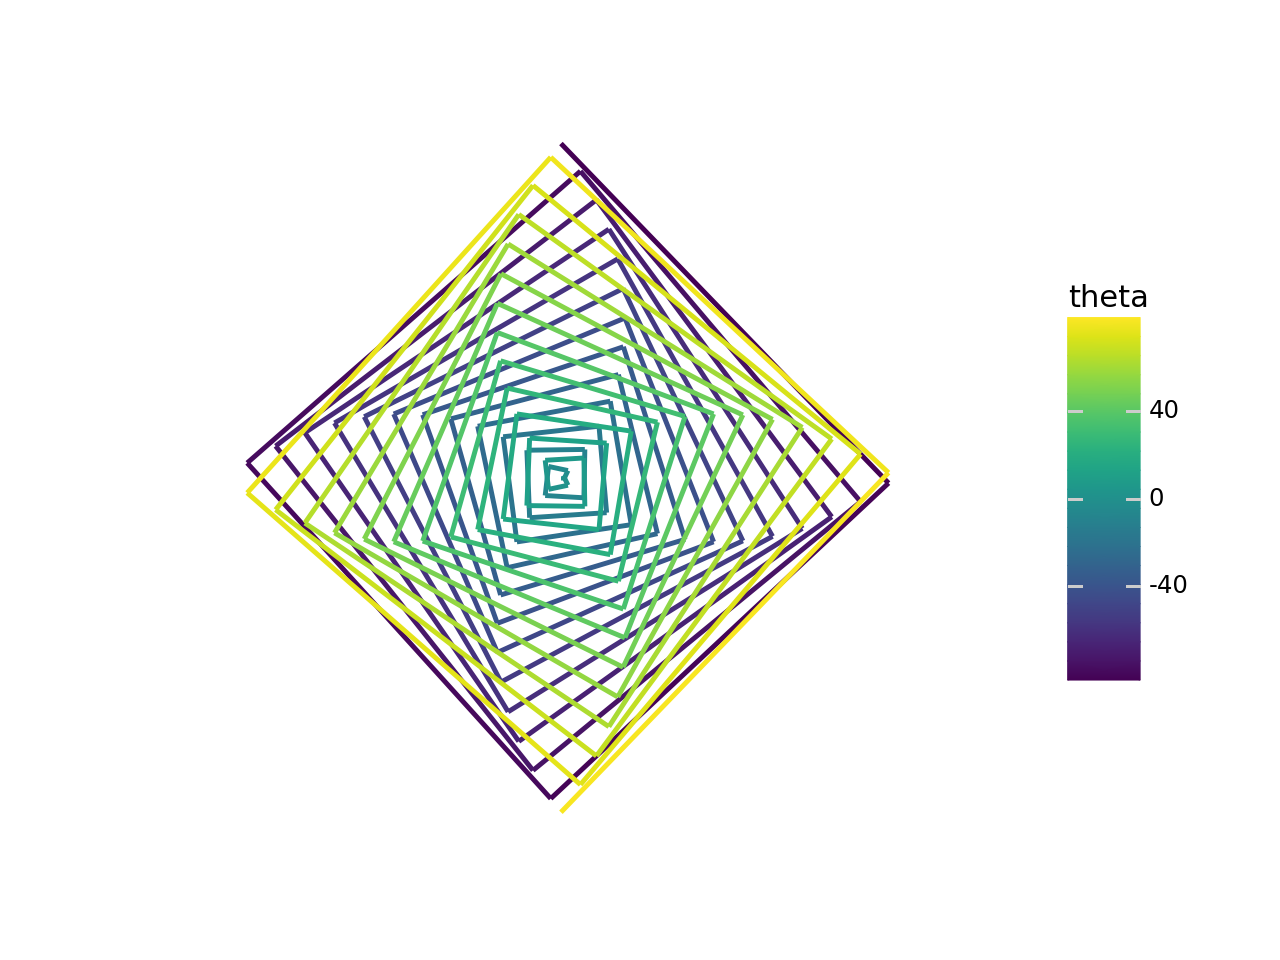

In [3]:
# Gallery Plot

plot(kmax)